### Before the trip begin

#####  If you like my work, please hit upvote since it will keep me motivated

* **1. Introduction**   
* **2. Data Preparation**
   * 2.1 Import Libaries
   * 2.2 Load Data
   * 2.3 Normalization
   * 2.4 Reshape
   * 2.5 Check the Data
   * 2.6 Split to train and test
* **3. Data Augmentation**
* **4. CNN**
   * 4.1 Label encoding
   * 4.2 Build the Network
   * 4.3 Evaluate the Model
* **5. Let's Predict**

# 1. Introduction
![](https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.


# 2. Data Preparation
## 2.1 Import libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten ,BatchNormalization , MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

C:\Users\Melody\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2.2 Load Data

In [3]:
ds_train=pd.read_csv("digit-recognizer/train.csv")
ds_test=pd.read_csv("digit-recognizer/test.csv")

In [8]:
print("Train dataset :",ds_train.shape)
print("Test dataset :",ds_test.shape)

Train dataset : (42000, 785)
Test dataset : (28000, 784)


In [9]:
X=ds_train.drop(['label'],axis=1)
y=ds_train['label']
print("done!")

done!


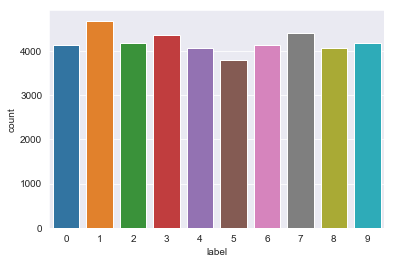

In [11]:
sns.set_style('darkgrid')
sns.countplot(y)

As you can see we have the count of all label are almost in the save interval [3500,5000], that's good for the training, for example if we had just 1000 samples of label 1 that will be a problem , the model will find difficulties to detect label 1"less accuracy ", so that's not going to happend everything look fine .

## 2.3 Normalization

We will use Grayscale normalization the model will work faster if the interval of data between [0,1] instead of [0,255]

In [21]:
X.shape

(42000, 28, 28, 1)

In [18]:
X=X/255.0
ds_test=ds_test/255.0

## 2.4 Reshape

From 1D vectors to 28×28×1 (3D)

In [20]:
X = X.values.reshape(-1,28,28,1)
ds_test = ds_test.values.reshape(-1,28,28,1)

## 2.5 check the Dataset

Before we move forward we need to check our dataset first if there anything wrong and the label are correct.

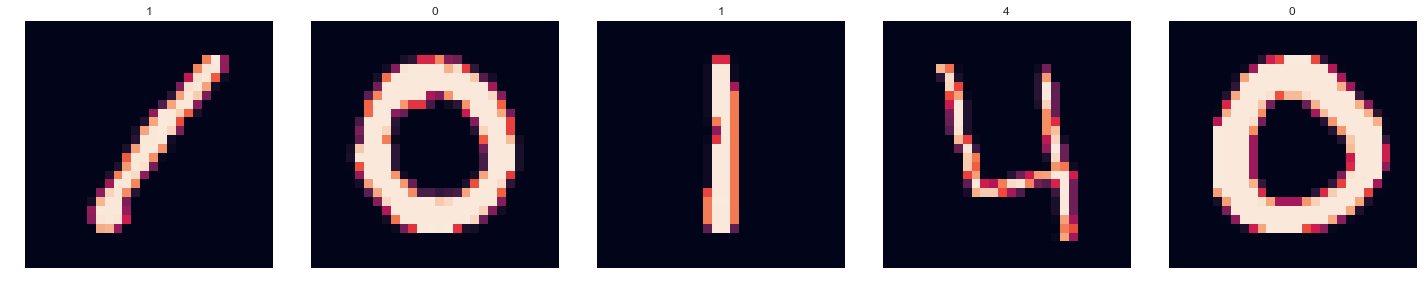

In [22]:
fig,axs=plt.subplots(1,5,figsize=(20,5))
fig.tight_layout()

for i in range(5):
    axs[i].imshow(X[i].reshape(28,28))
    axs[i].axis('off')
    axs[i].set_title(y[i])
plt.show()

Everything look fine !

## 2.6 Split to train and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state=4)

In [24]:
len(X_train) #we will set batch size to 56 and step per epouch to 660

36960

# 3. Data Augmentation

![](http://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_data_augmentation_in_place.png)

We will use data augmentation is called in-place data augmentation, the process is input batch of images to the IDG(ImageDataGenerator), and transforms each image in the batch using random translation (given parameter),at the end the transformed batch returned to the calling function.
The idea here is to avoid Over-fitting , we won't let the model train with the same pictures for example the model should train using different pictures of label 1.

In [56]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1, 
                            rotation_range=10)  
dataGen.fit(X_train)

### After Data Augmentation

In [57]:
batches= dataGen.flow(X_train,y_train,batch_size=20)

In [58]:
X_batch,y_batch = next(batches)

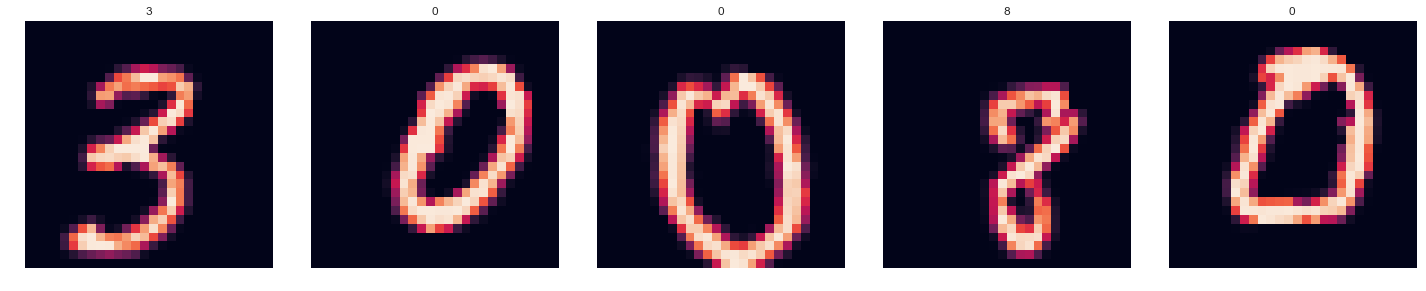

In [59]:
fig,axs=plt.subplots(1,5,figsize=(20,5))
fig.tight_layout()

for i in range(5):
    axs[i].imshow(X_batch[i].reshape(28,28))
    axs[i].axis('off')
    axs[i].set_title(y_batch[i])
plt.show()

Cool!!

# 4. CNN

## 4.1 Label encoding

In [60]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## 4.2 Build the Network 

In [62]:
model = Sequential()

#First
model.add(Conv2D(filters = 64, kernel_size = (3,3) ,activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 56, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 48, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))

#Output
model.add(Dense(10, activation = "softmax"))


model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 56)        32312     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 56)        224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 56)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 56)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        32320     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 48)         

In [64]:
#you can set more than 10 epochs to get more accuracy 
history = model.fit_generator(dataGen.flow(X_train,y_train, batch_size=56),
                              epochs = 10, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=660)


# For 10 epochs we get 
#  loss: 0.0614 
#  accuracy: 0.9838 
#  val_loss: 0.0364 
#  val_accuracy: 0.9921


Epoch 1/10


KeyboardInterrupt: 

## 4.3 Evaluate The Model

In [ ]:
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,7))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epoch')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('epoch')



score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

As you can see when we only used 10 epoch the model look great and we tried to avoid Overfitting and Underfitting

# 5. Let's Predict

In [ ]:
results = model.predict(ds_test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("CNN_Digit_Recognizer.csv",index=False)

###  If you like my work, please hit upvote since it will keep me motivated